In [37]:
import pandas as pd
from visualizations.vis import pcshow
import os.path as osp
import numpy as np

import time
%matplotlib inline

In [38]:
# idx = 185
# filename = '0'*(7-len(str(idx)))+str(idx)+"_labels.csv"
# filename

In [39]:
filename = "0000420"
pcw = pd.read_csv("../../OverfittedHackathon_data/voxelling_output/submission_files/checks2/%s_pointcloud.csv"%filename, header=None)/100
pred = pd.read_csv("../../OverfittedHackathon_data/voxelling_output/submission_files/checks2/%s_labels.csv"%filename, header=None)
# # gt = pd.read_csv("voxelling_output/submission_files/vid_1_gt/"+filename, header=None)

In [40]:
# labeled_pc
pcw["gt"] = pred.values
pcw = pcw.values

In [41]:
mask = np.zeros(pcw.shape[0]).astype(int)
# mask[(pred==1.).values.T[0] & (pred==gt).values.T[0]] = 1       # tp - purple
# mask[(pred==1.).values.T[0] & (pred!=gt).values.T[0]] = 2       # fp - orange
# mask[(pred==0.).values.T[0] & (pred!=gt).values.T[0]] = 3       # fn - green
mask[(pred==1.).values.T[0]] = 3      # tp - purple

In [43]:
pcshow(pcw, max_points=80000, point_cloud_coloring=mask)

In [36]:
df = pd.DataFrame(pcw)

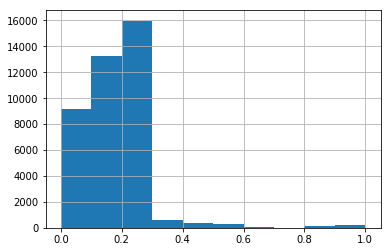

In [29]:
df[3].hist()

In [ ]:
import cv2
np.zeros()

In [ ]:
df = pd.DataFrame(pcw)
df.columns = list('xyzrl')
df["z_mod"] = df.z/df.x#/np.tan(0.2*np.pi/180)
print(df.shape)
df = df[df.x<df.x.min()+3]
df = df[df.z<(df.z.min()+0.1)]
print(df.shape)

df.plot(kind="scatter", x="x", y="y", figsize=(10, 10), s=1)

In [ ]:
df.z.max()